# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

Load the project data and have a look at the general information.

In [2]:
# Load the data file into a DataFrame

data=pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [3]:
# print the general/summary information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data
data.head(30)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


in the general information i notice a lot of missing values in model_year, cylinders, odometer, paint_color, is_4wd. These issues need further investigation and changes.

In [5]:

data['model'].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
kia sorento                           236
acura tl                              236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

There are some columns with inappropriate data types. I will change date_posted, model_year, cylinders.

I  see that the most number of missing values contains such columns as 'is_4wd', 'odometer'/

### Conclusions and further steps

My conclusion regarding the initial data is that we should clean up the dataframe by removing and replacing missing data and some column formats, before moving on to analyzing it and the impact of various factors on pricing. I think that data of price, fuel, transmission, model, type looks normal and the rest does not.

In the next step we will treat missing values in the part of data that contains model year, mileage, cylinders, color and car drive to make it more suitable for the required analysis.

## Treat missing values (if any)

Missing values for each column have a different nature. Therefore, we will apply a differentiated approach to each column.
Missing values in 'Model year' we will replace whith the most common value for the corresponding model,
in 'cylinders' whith the common number for a model engine, 
in 'paint_color' just fill the absent values as unknown, 
in 'is_4wd' we will assume, as indicated in the description for the project, that if the boolean value is not one, then we indicate zero.
in 'odometer' I suppose it is most convenient to take the average mileage over the model_year group.

In [6]:
data['model_year']=data['model_year'].replace(np.nan, -100)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [7]:
common_model_cylinders= data.groupby('model')['cylinders'].apply(lambda x: x.value_counts().idxmax()).to_dict()
data['cylinders']=data['cylinders'].fillna(data.model.map(common_model_cylinders))
data['paint_color']=data['paint_color'].fillna('unknown')
data['is_4wd']=data['is_4wd'].fillna(0)
data['odometer']=data['odometer'].fillna(data.groupby(['model_year', 'condition'])['odometer'].transform('median'))

data.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        7
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [8]:
# Reviewer's code 2

data.groupby(['model_year'] and ['condition'])['odometer'].median()

condition
excellent    106000.0
fair         182000.0
good         130271.0
like new      73800.0
new            7196.5
salvage      147000.0
Name: odometer, dtype: float64

In [9]:
# Reviewer's code 2

data.groupby(['model_year', 'condition'])['odometer'].median()

model_year  condition
-100.0      excellent    106130.0
            fair         170000.0
            good         129060.0
            like new      78793.5
            new           24547.0
                           ...   
 2019.0     excellent     14531.0
            good          20168.5
            like new      12606.0
            new             151.0
            salvage        9621.0
Name: odometer, Length: 276, dtype: float64

In [10]:
data['odometer']=data['odometer'].replace(np.nan, -100)
data.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [11]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000
mean,12132.464920,1861.566346,6.121494,115200.475973,0.496303,39.55476
std,10040.803015,539.180233,1.657296,62189.686784,0.499991,28.20427
min,1.000000,-100.000000,3.000000,-100.000000,0.000000,0.00000
25%,5000.000000,2005.000000,4.000000,73239.000000,0.000000,19.00000
50%,9000.000000,2010.000000,6.000000,114411.000000,0.000000,33.00000
75%,16839.000000,2014.000000,8.000000,152381.000000,1.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000


## Fix data types

Now let's fix some of the data types to get more readable dataset, without excess float.

In [12]:
data['model_year']=data['model_year'].astype(int)
data['cylinders']=data['cylinders'].astype(int)
data['odometer']=data['odometer'].astype(int)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,-100,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,193850,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28


## Enrich data

To make the data analysis easier, let's change data type of 'date_posted' from object to datetime64 and add columns with year, month, day. In the future, this will allow us to make calculations based on the year column.

In [13]:
# Add datetime values for when the ad was placed

data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.1+ MB


In [14]:
data['year_posted']=data['date_posted'].dt.year
data['month_posted']=data['date_posted'].dt.month
data['day_posted']=data['date_posted'].dt.weekday
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19,2018,6,5
1,25500,-100,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,2018,10,4
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2019,2,3
3,1500,2003,ford f-150,fair,8,gas,193850,automatic,pickup,unknown,0.0,2019-03-22,9,2019,3,4
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,2019,4,1


In [15]:
# Add the vehicle's age when the ad was placed
data['vehicle_age']= data['year_posted']-data['model_year']
data['vehicle_age'].value_counts()

5     3524
7     3467
4     3456
6     3440
3     3169
      ... 
43       1
71       1
69       1
65       1
63       1
Name: vehicle_age, Length: 70, dtype: int64

In [16]:
data['vehicle_age']=data['vehicle_age'].replace(0, 1)

In [17]:
# Add the vehicle's average mileage per year
data['average_mil_per_year']=data['odometer']/data['vehicle_age']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 51525 non-null  int64         
 1   model_year            51525 non-null  int64         
 2   model                 51525 non-null  object        
 3   condition             51525 non-null  object        
 4   cylinders             51525 non-null  int64         
 5   fuel                  51525 non-null  object        
 6   odometer              51525 non-null  int64         
 7   transmission          51525 non-null  object        
 8   type                  51525 non-null  object        
 9   paint_color           51525 non-null  object        
 10  is_4wd                51525 non-null  float64       
 11  date_posted           51525 non-null  datetime64[ns]
 12  days_listed           51525 non-null  int64         
 13  year_posted     

In [18]:
# It might help to replace the condition values with something that can be manipulated more easily
condition_dic={'new':5, 'like new':4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0,}
data['condition']=data.apply(lambda x: condition_dic[x['condition']], axis=1)


data.head(15)




,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,vehicle_age,average_mil_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19,2018,6,5,7,20714.285714
1,25500,-100,ford f-150,2,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,2018,10,4,2118,41.881492
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2019,2,3,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,193850,automatic,pickup,unknown,0.0,2019-03-22,9,2019,3,4,16,12115.625000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,2019,4,1,2,40451.500000
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1.0,2018-06-20,15,2018,6,2,4,14488.500000
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,0.0,2018-12-27,73,2018,12,3,3,26404.000000
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,1.0,2019-01-07,68,2019,1,0,6,18245.500000
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,1.0,2018-07-16,19,2018,7,0,6,17362.333333
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,1.0,2019-02-15,17,2019,2,4,11,13381.000000


## Check clean data

Let's take a look on the data. It's ready for starting the analysis, a sample of data looks fine.

In [19]:
# print the general/summary information about the DataFrame
data.describe()


,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,day_posted,vehicle_age,average_mil_per_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,1861.566346,2.637535,6.121494,115200.464241,0.496303,39.55476,2018.307462,6.628491,3.005434,156.782416,16622.742710
std,10040.803015,539.180233,0.712447,1.657296,62189.689711,0.499991,28.20427,0.461447,3.474134,1.997759,539.168518,13046.489261
min,1.000000,-100.000000,0.000000,3.000000,-100.000000,0.000000,0.00000,2018.000000,1.000000,0.000000,1.000000,-6.666667
25%,5000.000000,2005.000000,2.000000,4.000000,73239.000000,0.000000,19.00000,2018.000000,3.000000,1.000000,4.000000,9827.176471
50%,9000.000000,2010.000000,3.000000,6.000000,114411.000000,0.000000,33.00000,2018.000000,7.000000,3.000000,8.000000,14531.000000
75%,16839.000000,2014.000000,3.000000,8.000000,152381.000000,1.000000,53.00000,2019.000000,10.000000,5.000000,13.000000,20680.750000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.00000,2019.000000,12.000000,6.000000,2119.000000,373200.000000


In [20]:
# print a sample of data
data.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,vehicle_age,average_mil_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19,2018,6,5,7,20714.285714
1,25500,-100,ford f-150,2,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,2018,10,4,2118,41.881492
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2019,2,3,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,193850,automatic,pickup,unknown,0.0,2019-03-22,9,2019,3,4,16,12115.625000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,2019,4,1,2,40451.500000


## Study core parameters

Let's study the parameters listed below:

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition
Some outliers will affect on readable properties of the histograms. We will cut them from our dataframe.
Analysis of a list of core similar numerical parameters needs repetition of the same jobs multiple times, so we will use functions to avoid duplicating code.

<AxesSubplot:xlabel='price', ylabel='Count'>

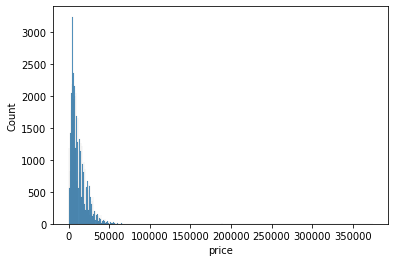

In [21]:
#

sns.histplot(data=data, x="price")


In [22]:
#
data['price'].describe()


count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [23]:
np.percentile(data.price, 97)

34950.0

In [24]:
#
np.percentile(data.price, 5)



1950.0

In [25]:
np.percentile(data.price, 2)

371.48

In [26]:
np.percentile(data.price, 98)

37995.0

<AxesSubplot:xlabel='price'>

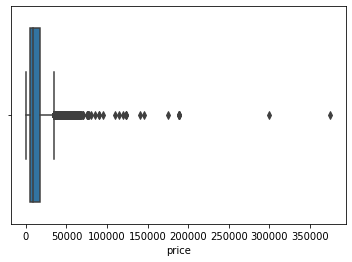

In [27]:
#
sns.boxplot(x=data['price'])


In [28]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
min_iqr=Q1-1.5*IQR
max_iqr=Q3+1.5*IQR
print('min border:',min_iqr)
print('max border:',max_iqr)

5000.0
16839.0
min border: -12758.5
max border: 34597.5


In [1]:
data[data['price']==min_iqr]

NameError: name 'data' is not defined

In [30]:
import matplotlib.pyplot as plt

In [31]:
def distribution_IQR(parameter):
    print('The histogram of: {}'.format(parameter))
    data[parameter].hist()
    plt.show()
    if data[parameter].mean()>data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
    Q1 = data[parameter].quantile(0.25)
    Q3 = data[parameter].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr=Q1-1.5*IQR
    max_iqr=Q3+1.5*IQR
    print('---------------------------------------')
    print('min border:',min_iqr)
    print('max border:',max_iqr)
    print('---------------------------------------')
    if min_iqr<0:
        print('The outliers are considered to be values above',max_iqr)
        print('We have',len(data[data[parameter]>max_iqr]),"values that we can consider outliers")
    else:
        print('The outliers are considered to be values below',min_iqr, "and above",max_iqr)
        print('We have',len(data[(data[parameter]<min_iqr)|(data[parameter]>max_iqr)]),"values that we can consider outliers")

The histogram of: price


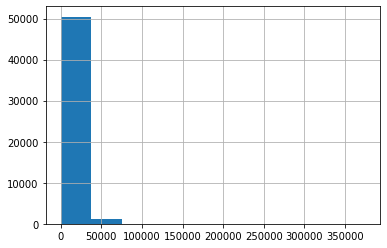

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: -12758.5
max border: 34597.5
---------------------------------------
The outliers are considered to be values above 34597.5
We have 1646 values that we can consider outliers


In [32]:
distribution_IQR('price')

In [33]:
def distribution_percentile(parameter):
    print('The histogram of: {}'.format(parameter))
    data[parameter].hist()
    plt.show()
    if data[parameter].mean()>data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
    #data[parameter].describe()
    ninety_eight = np.percentile(data[parameter], 98)
    two = np.percentile(data[parameter], 2)
    print('---------------------------------------')
    print('min border:',two)
    print('max border:',ninety_eight)
    print('---------------------------------------')
    print('The outliers are considered to be values below',two, "and above",ninety_eight)
    print('We have',len(data[(data[parameter]<two)|(data[parameter]>ninety_eight)]),"values that we can consider outliers")

The histogram of: price


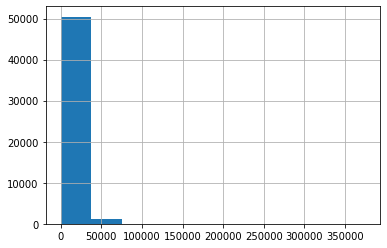

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: 371.48
max border: 37995.0
---------------------------------------
The outliers are considered to be values below 371.48 and above 37995.0
We have 2059 values that we can consider outliers


In [34]:
distribution_percentile('price')

The histogram of: price


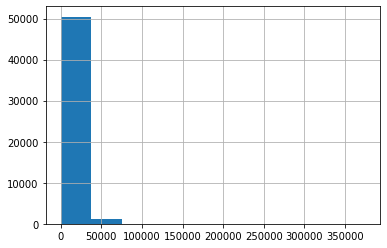

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: 371.48
max border: 37995.0
---------------------------------------
The outliers are considered to be values below 371.48 and above 37995.0
We have 2059 values that we can consider outliers
The histogram of: vehicle_age


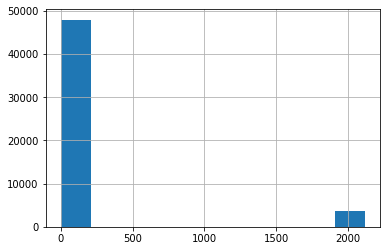

The distribution is skewed to the right
---------------------------------------
Statistics on: vehicle_age
count    51525.000000
mean       156.782416
std        539.168518
min          1.000000
25%          4.000000
50%          8.000000
75%         13.000000
max       2119.000000
Name: vehicle_age, dtype: float64
---------------------------------------
min border: 1.0
max border: 2119.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 2119.0
We have 0 values that we can consider outliers
The histogram of: odometer


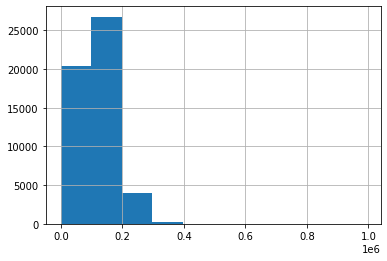

The distribution is skewed to the right
---------------------------------------
Statistics on: odometer
count     51525.000000
mean     115200.464241
std       62189.689711
min        -100.000000
25%       73239.000000
50%      114411.000000
75%      152381.000000
max      990000.000000
Name: odometer, dtype: float64
---------------------------------------
min border: 3800.0
max border: 250825.0
---------------------------------------
The outliers are considered to be values below 3800.0 and above 250825.0
We have 2060 values that we can consider outliers
The histogram of: cylinders


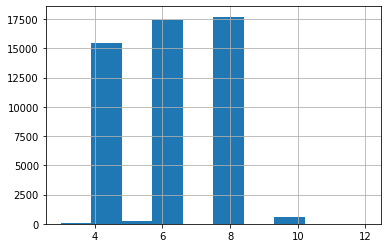

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders
count    51525.000000
mean         6.121494
std          1.657296
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
min border: 4.0
max border: 8.0
---------------------------------------
The outliers are considered to be values below 4.0 and above 8.0
We have 585 values that we can consider outliers
The histogram of: condition


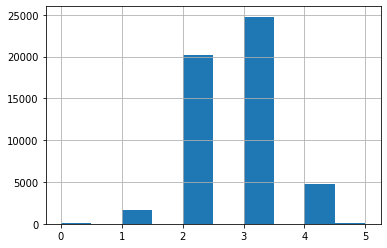

The distribution is skewed to the left
---------------------------------------
Statistics on: condition
count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64
---------------------------------------
min border: 1.0
max border: 4.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 4.0
We have 258 values that we can consider outliers


In [35]:
#- The vehicle's age when the ad was placed

for parameter in ['price','vehicle_age','odometer','cylinders','condition']:
    distribution_percentile(parameter)



## Study and treat outliers

Such columns as 'price','vehicle_age','odometer','cylinders','condition' may contain outliers. Further, we will create a DataFrame without those outliers.Let's suppose that outliers will be 2% from the margin, close to the limits for normal range of values(within two to three standard deviations from the mean).

In [36]:
#creating borders
border_list=[]
for parameter in ['price','vehicle_age','odometer','cylinders','condition', 'model_year']:
    ninety_eight = np.percentile(data[parameter], 98)
    two = np.percentile(data[parameter], 2)
    border_list.append([parameter,two,ninety_eight])



In [37]:
border_list

[['price', 371.48, 37995.0],
 ['vehicle_age', 1.0, 2119.0],
 ['odometer', 3800.0, 250825.0],
 ['cylinders', 4.0, 8.0],
 ['condition', 1.0, 4.0],
 ['model_year', -100.0, 2018.0]]

In [38]:
border_data=pd.DataFrame(border_list,columns=['parameter','lower_limit','upper_limit'])
border_data


,parameter,lower_limit,upper_limit
0,price,371.48,37995.0
1,vehicle_age,1.00,2119.0
2,odometer,3800.00,250825.0
3,cylinders,4.00,8.0
4,condition,1.00,4.0
5,model_year,-100.00,2018.0


In [39]:
# Store data without outliers in a separate DataFrame
data_filtered= data.query('(371.48<=price<=37995.0) and (1<=vehicle_age<=23) and (3842.84<=odometer<=250825 or odometer==-100) and (4<=cylinders<=8) and (1995<=model_year<=2018 or model_year==-100)')



In [40]:
data_filtered.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,day_posted,vehicle_age,average_mil_per_year
count,42967.000000,42967.000000,42967.000000,42967.000000,42967.000000,42967.000000,42967.000000,42967.000000,42967.000000,42967.000000,42967.000000,42967.000000
mean,11790.334652,2010.055275,2.634045,6.028068,116589.130635,0.486676,39.546512,2018.302907,6.660972,2.997789,8.272349,18114.022941
std,8114.556946,5.033884,0.695035,1.608583,52476.282759,0.499828,28.197928,0.459521,3.466816,1.995414,5.013841,11749.103893
min,388.000000,1995.000000,0.000000,4.000000,-100.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,1.000000,-6.666667
25%,5495.000000,2007.000000,2.000000,4.000000,79079.000000,0.000000,19.000000,2018.000000,4.000000,1.000000,4.000000,11256.230769
50%,9500.000000,2011.000000,3.000000,6.000000,117130.000000,0.000000,33.000000,2018.000000,7.000000,3.000000,7.000000,15311.333333
75%,16444.500000,2014.000000,3.000000,8.000000,152381.000000,1.000000,53.000000,2019.000000,10.000000,5.000000,12.000000,21262.000000
max,37995.000000,2018.000000,5.000000,8.000000,250825.000000,1.000000,271.000000,2019.000000,12.000000,6.000000,23.000000,195700.000000


In [41]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42967 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 42967 non-null  int64         
 1   model_year            42967 non-null  int64         
 2   model                 42967 non-null  object        
 3   condition             42967 non-null  int64         
 4   cylinders             42967 non-null  int64         
 5   fuel                  42967 non-null  object        
 6   odometer              42967 non-null  int64         
 7   transmission          42967 non-null  object        
 8   type                  42967 non-null  object        
 9   paint_color           42967 non-null  object        
 10  is_4wd                42967 non-null  float64       
 11  date_posted           42967 non-null  datetime64[ns]
 12  days_listed           42967 non-null  int64         
 13  year_posted     

In [1]:
#

print(len(data_filtered))

data_filtered[['price', 'vehicle_age', 'odometer', 'cylinders', 'condition']].describe().loc[['min', 'max']]

NameError: name 'data_filtered' is not defined

## Study core parameters without outliers

Further let's use the filtered data to make new plots whithout outliers.

Text(0, 0.5, 'ADS')

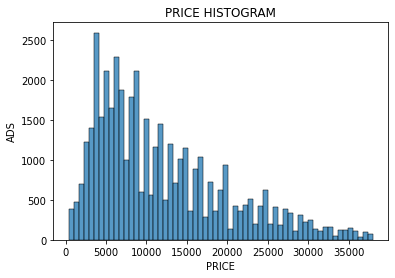

In [43]:
sns.histplot(data=data_filtered['price'])
plt.title('PRICE HISTOGRAM')
plt.xlabel('PRICE')
plt.ylabel('ADS')


In [44]:
data_filtered['price'].describe()

count    42967.000000
mean     11790.334652
std       8114.556946
min        388.000000
25%       5495.000000
50%       9500.000000
75%      16444.500000
max      37995.000000
Name: price, dtype: float64

Text(0, 0.5, 'ADS')

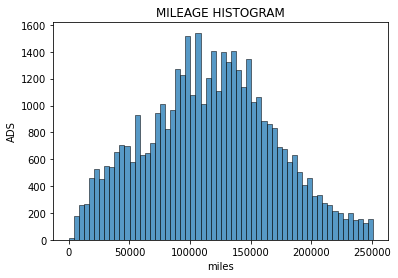

In [45]:
sns.histplot(data=data_filtered['odometer'])
plt.title('MILEAGE HISTOGRAM')
plt.xlabel('miles')
plt.ylabel('ADS')

In [46]:
data_filtered['odometer'].describe()

count     42967.000000
mean     116589.130635
std       52476.282759
min        -100.000000
25%       79079.000000
50%      117130.000000
75%      152381.000000
max      250825.000000
Name: odometer, dtype: float64

<AxesSubplot:xlabel='condition'>

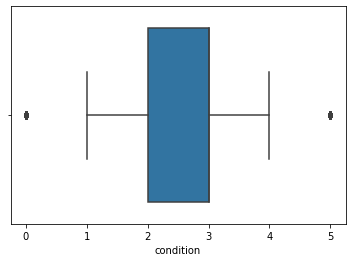

In [47]:
sns.boxplot(x=data_filtered['condition'])

In [48]:
data_filtered['condition'].value_counts()

3    20771
2    17075
4     3828
1     1157
0       87
5       49
Name: condition, dtype: int64

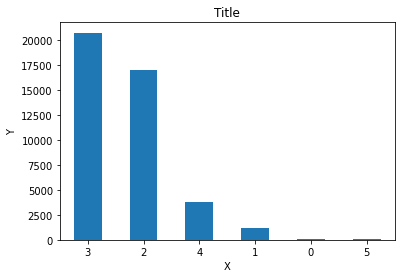

In [49]:
#2

data_filtered['condition'].value_counts().plot(kind='bar')

plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y')

plt.xticks(rotation=0);

In [50]:
data_filtered['condition'].describe()

count    42967.000000
mean         2.634045
std          0.695035
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

<AxesSubplot:xlabel='cylinders'>

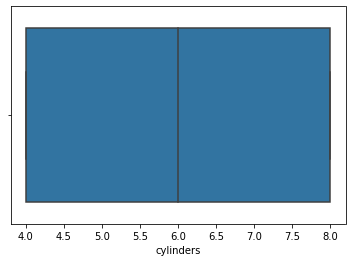

In [51]:
sns.boxplot(x=data_filtered['cylinders'])

In [52]:
data_filtered['cylinders'].value_counts()

6    14983
8    14233
4    13509
5      242
Name: cylinders, dtype: int64

In [53]:
data_filtered['cylinders'].describe()

count    42967.000000
mean         6.028068
std          1.608583
min          4.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          8.000000
Name: cylinders, dtype: float64

<AxesSubplot:xlabel='vehicle_age', ylabel='Count'>

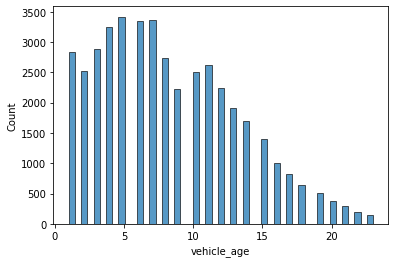

In [54]:
sns.histplot(data=data_filtered['vehicle_age'])

The graphical representation shows that most of the values are not much than 11 years. The peak value in terms of the number of ads is 5 years.

In [55]:
data_filtered['vehicle_age'].describe()

count    42967.000000
mean         8.272349
std          5.013841
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         23.000000
Name: vehicle_age, dtype: float64

## Ads lifetime

The tipical advertisement lifetime is 33 days. Using the percentile method, we see that the 10% removed quickly, and the 10% that were listed for an abnormally long time is not a big part of the dataset.

In [56]:
data_filtered['days_listed'].median()


33.0

In [57]:
data_filtered['days_listed'].mean()

39.54651243977936

<AxesSubplot:xlabel='days_listed', ylabel='Count'>

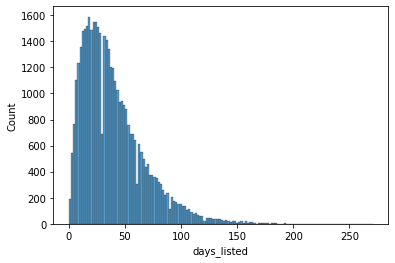

In [58]:
sns.histplot(data=data_filtered['days_listed'])

Actualy, we can conclude that almost all cars are sold within 150 days. 1st quartile (or 25th percentile) is 19 days. So, we can say that 15 is very fast. 3rd quartile (or 75th percentile) is 53 days. Then let's say that very long is more than 100 days. More than 150 days is abnormally long.

In [59]:
#The tipical lifetime of an ad is 33 days, because the distribution is skewed. Let's look at the ads that were removed quickly
np.percentile(data_filtered.days_listed, 10)



10.0

In [60]:
# the ads that were listed for a long time  

np.percentile(data_filtered.days_listed, 90)


77.0

In [61]:
#code

data_filtered.days_listed.describe()

count    42967.000000
mean        39.546512
std         28.197928
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

## Average price per each type of vehicle

The average price among the types of vehicles is the highest for truck, and the cheapest are hatchbacks. According a graph showing the dependence of the number of ads on the vehicle type, the two types have the greatest number of ads are SUV and SEDAN.

<Figure size 23760x23760 with 0 Axes>

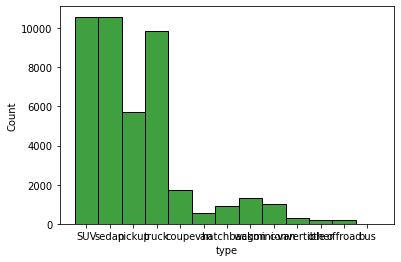

<Figure size 23760x23760 with 0 Axes>

In [62]:
sns.histplot(data=data_filtered['type'], color='green')
plt.figure(figsize=(330, 330))

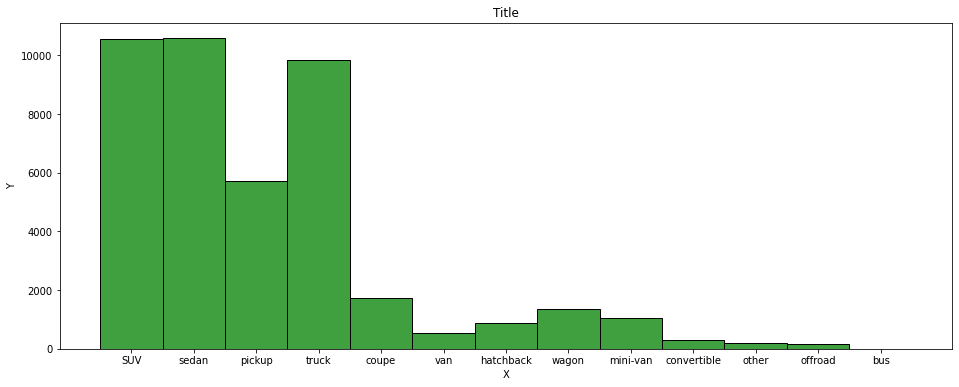

In [63]:
# Reviewer's code 2

plt.figure(figsize=(16, 6))
sns.histplot(data=data_filtered['type'], color='green')

plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y')

plt.xticks(rotation=0);

In [64]:
data_filtered['type'].value_counts()

sedan          10588
SUV            10564
truck           9861
pickup          5714
coupe           1739
wagon           1341
mini-van        1035
hatchback        892
van              547
convertible      300
other            207
offroad          171
bus                8
Name: type, dtype: int64

In [65]:
type_price_pivot=data_filtered.pivot_table(index='type', values='price', aggfunc='mean')
type_price_pivot.sort_values(by='price', ascending=False)

,price
type,
truck,16160.428963
pickup,15785.694610
offroad,14904.602339
coupe,14041.554917
convertible,13231.090000
bus,11306.875000
SUV,10966.810867
other,10730.159420
van,10473.725777


## Price factors

Factors impacts on the price in that order:
1.SUV price have negative correlation whith age -0.63. 
negative correlation whith mileage -0.65.
week positive correlation whith condition 0.29. 
transmission type - almost all cars have automatic transmission, the other types are less than 5% of the hole distribution. So there is no impact on the price in this dataset
color also have no impact, it's completely randome.
2.Sedan price have negative correlation whith age -0.67. 
Mileage. negative correlation -0.66.
Condition. Week positive correlation 0.32. 
Transmission type - almost all cars have automatic transmission, the other types are less than 5% of the hole distribution (less than two sigma standard deviation). Automatic transmission is significantly more expensive, than manual. Obviously, this dataset was collected in USA, because the manual type is more popular in Europe.
Color also have no impact, it's completely randome. 

The categories must have at least 50 ads, so we should get rid of some colors in SUV and sedan types.

Let's build correlation matrix and correlation plots.

In [66]:
SUV=data_filtered[data_filtered['type']=='SUV']
SUV

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,vehicle_age,average_mil_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19,2018,6,5,7,20714.285714
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,1.0,2019-01-07,68,2019,1,0,6,18245.500000
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,1.0,2018-07-16,19,2018,7,0,6,17362.333333
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,1.0,2019-02-15,17,2019,2,4,11,13381.000000
14,12990,2009,gmc yukon,3,8,gas,132285,automatic,SUV,black,1.0,2019-01-31,24,2019,1,3,10,13228.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012,chevrolet traverse,2,6,gas,144500,automatic,SUV,unknown,1.0,2019-03-05,1,2019,3,1,7,20642.857143
51496,4999,2002,toyota 4runner,3,6,gas,177901,automatic,SUV,unknown,1.0,2018-05-26,59,2018,5,5,16,11118.812500
51500,6995,2012,buick enclave,3,6,gas,157000,automatic,SUV,white,1.0,2018-08-04,17,2018,8,5,6,26166.666667
51502,7995,2011,chevrolet equinox,4,4,gas,111088,automatic,SUV,unknown,0.0,2019-04-01,175,2019,4,0,8,13886.000000


In [67]:
for_scatter=SUV[['price','vehicle_age','odometer', 'condition']]
for_scatter

,price,vehicle_age,odometer,condition
0,9400,7,145000,2
7,15990,6,109473,3
8,11500,6,104174,3
9,9200,11,147191,3
14,12990,10,132285,3
...,...,...,...,...
51495,9500,7,144500,2
51496,4999,16,177901,3
51500,6995,6,157000,3
51502,7995,8,111088,4


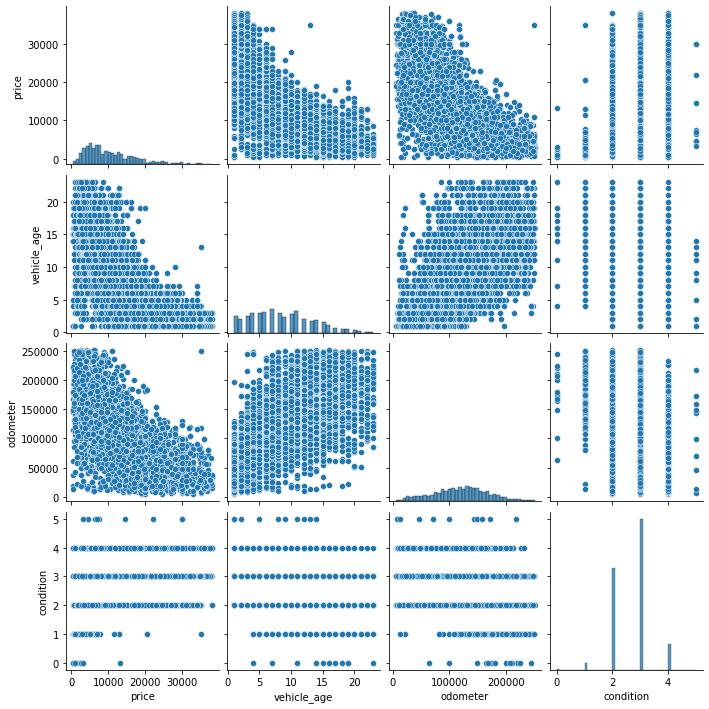

In [68]:
sns.pairplot(for_scatter)

<AxesSubplot:xlabel='condition', ylabel='price'>

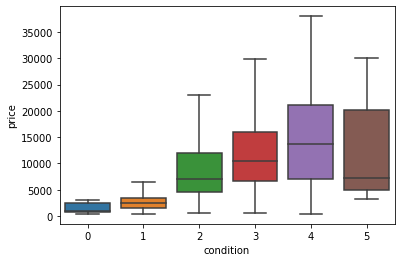

In [69]:
sns.boxplot(x="condition", y="price", data=SUV,showfliers = False)

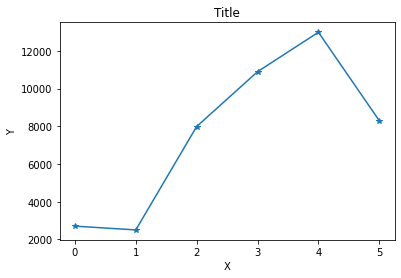

In [70]:
#

data_filtered.groupby('condition')['price'].median().plot(marker='*')

plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y');

In [71]:
for_scatter.corr()

,price,vehicle_age,odometer,condition
price,1.000000,-0.672988,-0.659538,0.287909
vehicle_age,-0.672988,1.000000,0.678544,-0.304646
odometer,-0.659538,0.678544,1.000000,-0.346462
condition,0.287909,-0.304646,-0.346462,1.000000


In [72]:
#Making sure that it has more than 50 listings
SUV['transmission'].value_counts()

automatic    10069
manual         413
other           82
Name: transmission, dtype: int64

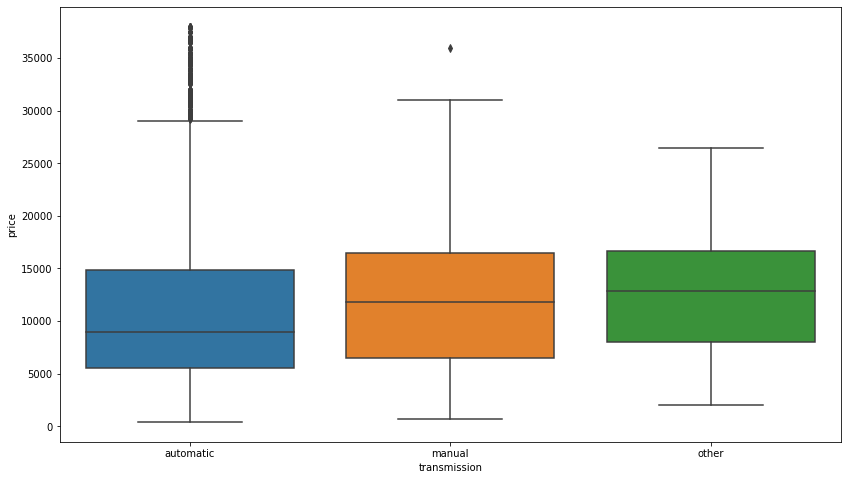

In [73]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=SUV)

In [74]:
SUV.groupby(['transmission'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,10069.0,10911.174595,7307.854915,399.0,5495.0,8990.0,14900.0,37995.0
manual,413.0,12006.501211,6604.327301,700.0,6500.0,11799.0,16500.0,36000.0
other,82.0,12562.048780,5620.935489,2000.0,7995.0,12900.0,16707.5,26500.0


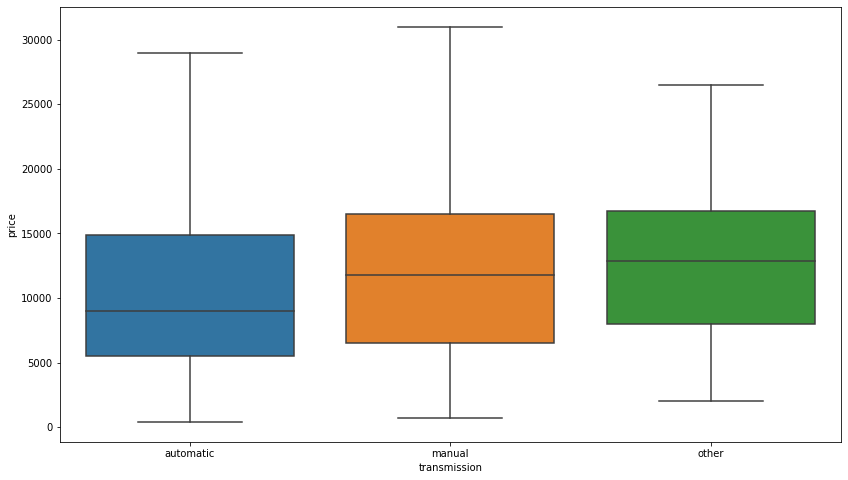

In [75]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=SUV,showfliers = False)

In [76]:
# the categories have less than 50 ads, their parameters are not valid for analysis

SUV['paint_color'].value_counts()

unknown    1898
black      1850
white      1677
silver     1352
grey       1040
blue        890
red         797
green       357
brown       312
custom      247
orange       69
yellow       40
purple       35
Name: paint_color, dtype: int64

In [77]:
SUV_color=SUV.query('paint_color!="purple" and paint_color!="yellow"')

In [78]:
SUV_color['paint_color'].value_counts()

unknown    1898
black      1850
white      1677
silver     1352
grey       1040
blue        890
red         797
green       357
brown       312
custom      247
orange       69
Name: paint_color, dtype: int64

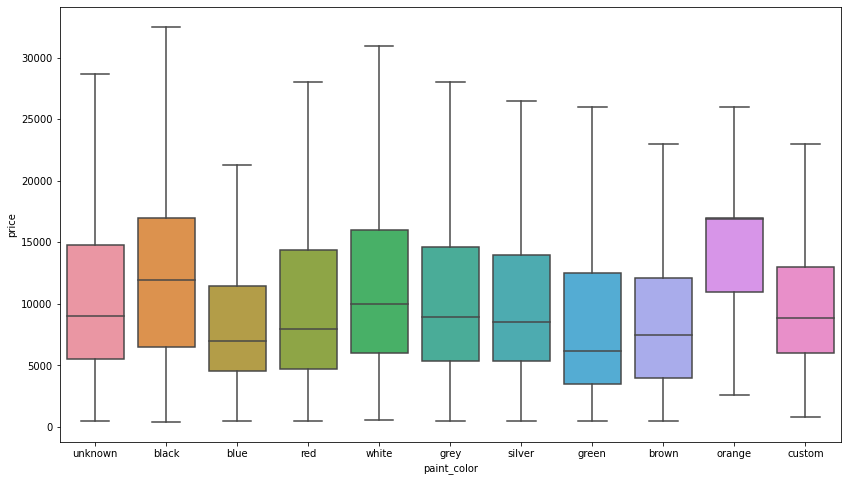

In [79]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="paint_color", y="price", data=SUV_color,showfliers = False)



The median is along the upper border and in general they are somehow more expensive. To be honest, I have never seen factory orange SUVs, maybe it's a protective color film or some kind of tuning? There are not so many of them in the sample, I do not think that this greatly affects the price. 

In [80]:
sedan=data_filtered[data_filtered['type']=='sedan']
sedan

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,vehicle_age,average_mil_per_year
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2019,2,3,6,18333.333333
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,2019,4,1,2,40451.500000
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1.0,2018-06-20,15,2018,6,2,4,14488.500000
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,0.0,2018-12-27,73,2018,12,3,3,26404.000000
11,8990,2012,honda accord,3,4,gas,111142,automatic,sedan,grey,0.0,2019-03-28,29,2019,3,3,7,15877.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,0.0,2018-10-03,37,2018,10,2,5,17627.200000
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,0.0,2018-11-14,22,2018,11,2,16,11343.750000
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0.0,2018-11-15,32,2018,11,3,9,14222.222222
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,0.0,2018-07-02,71,2018,7,0,5,27914.600000


In [81]:
for_scatter=sedan[['price','vehicle_age','odometer', 'condition']]
for_scatter

,price,vehicle_age,odometer,condition
2,5500,6,110000,4
4,14900,2,80903,3
5,14990,4,57954,3
6,12990,3,79212,3
11,8990,7,111142,3
...,...,...,...,...
51520,9249,5,88136,4
51521,2700,16,181500,0
51522,3950,9,128000,3
51523,7455,5,139573,2


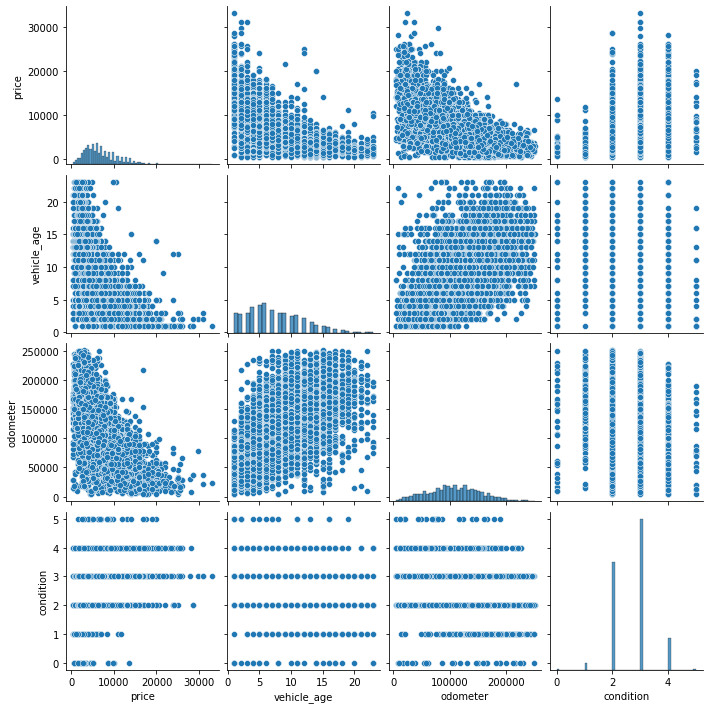

In [82]:
sns.pairplot(for_scatter)

<AxesSubplot:xlabel='condition', ylabel='price'>

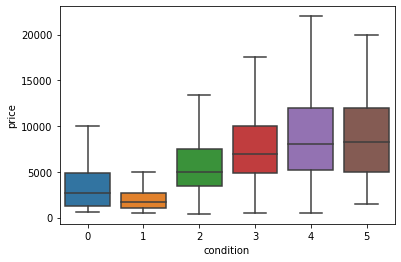

In [83]:
sns.boxplot(x="condition", y="price", data=sedan,showfliers = False)

In [84]:
for_scatter.corr()

,price,vehicle_age,odometer,condition
price,1.000000,-0.697626,-0.667065,0.313540
vehicle_age,-0.697626,1.000000,0.655408,-0.290601
odometer,-0.667065,0.655408,1.000000,-0.338490
condition,0.313540,-0.290601,-0.338490,1.000000


In [85]:
#Making sure that it has more than 50 listings
sedan['transmission'].value_counts()

automatic    10011
manual         512
other           65
Name: transmission, dtype: int64

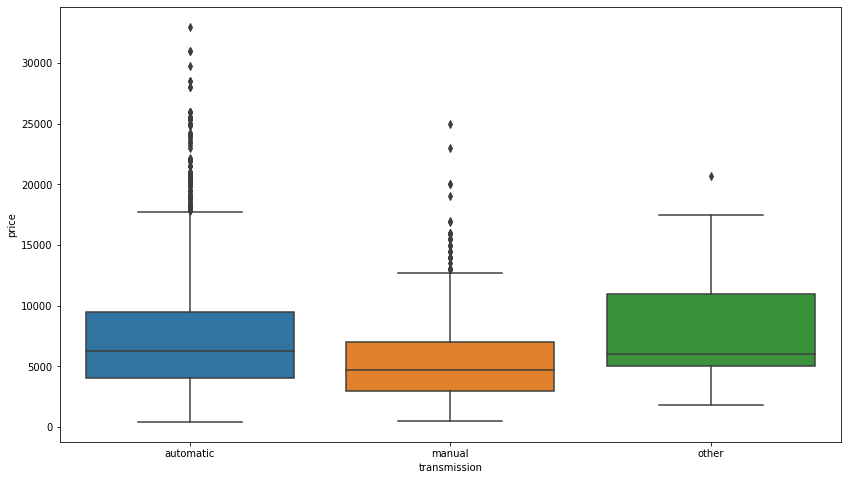

In [86]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=sedan)

In [87]:
sedan.groupby(['transmission'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,10011.0,7192.984417,4093.654036,399.0,4000.0,6295.0,9499.0,32999.0
manual,512.0,5595.056641,3737.261988,500.0,2999.0,4700.0,6995.0,25000.0
other,65.0,7740.076923,4023.349574,1800.0,5000.0,5995.0,10988.0,20700.0


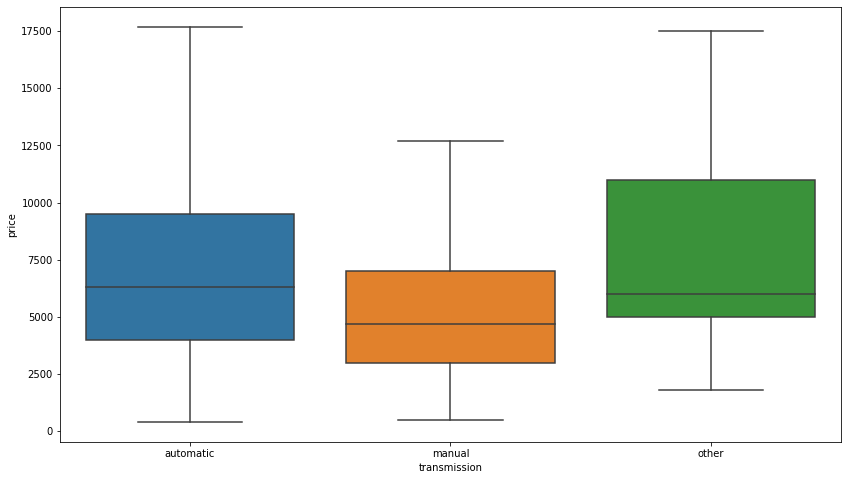

In [88]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=sedan,showfliers = False)

In [89]:
sedan['paint_color'].value_counts()

unknown    1904
silver     1824
black      1567
grey       1420
white      1300
blue       1078
red         813
custom      239
brown       226
green       170
purple       22
yellow       18
orange        7
Name: paint_color, dtype: int64

In [90]:

sedan_color=sedan.query('paint_color!="orange" and paint_color!="purple" and paint_color!="yellow"')

In [91]:
sedan_color['paint_color'].value_counts()

unknown    1904
silver     1824
black      1567
grey       1420
white      1300
blue       1078
red         813
custom      239
brown       226
green       170
Name: paint_color, dtype: int64

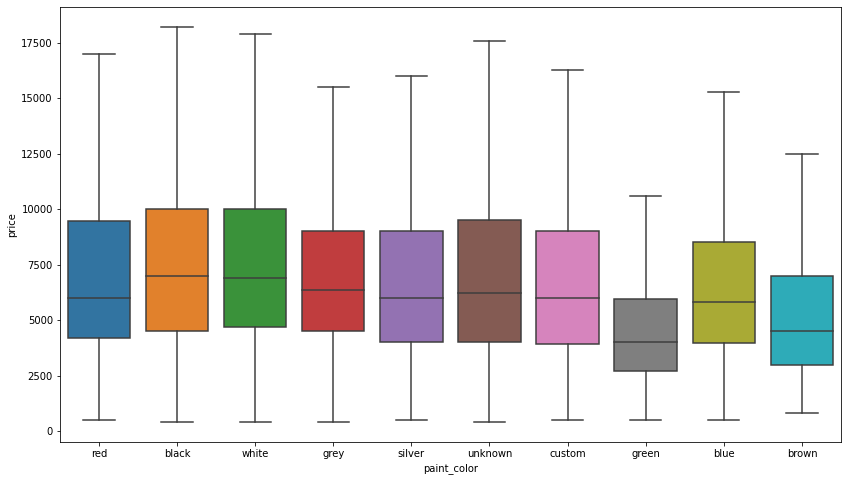

In [92]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="paint_color", y="price", data=sedan_color,showfliers = False)



There is a some difference between SUVs and Sedans. Automatic transmission is more expensive for sedans, because generally automatic have a rich complectation.The fact that SUVs with a manual gearbox are more expensive than an automatic one is due to the regional peculiarity of the market. By default, these households cars are bought with an automatic transmission. Options with a manual transmission are rather an exception. Possibly we are talking about a downshift gearbox for off-road use. It should also be noted that, in general, sedans become cheaper faster than SUVs. 
    And automatic are more common for both types. 



## General conclusion



In the end, I would like to summarize the conclusions made in the process of writing this project. We started by analyzing the missing values in such key parameters as mileage, year of manufacture, number of cylinders in the engine, and so on. Next, we replaced missing values, duplicates, cuted outliers. Methods and hypotheses are described in detail in each relevant paragraph. Additionally, we described the lifetime of advertisements in the database of this site. 
The database was cleared for further analysis. We identified two main types of vehicles offered for sale in this service: SUV and sedan. Based on them, hypotheses were built on the influence of various factors on the price of a car using graphs and histograms. 
Ultimately, we can come to the conclusion that the mileage and age of the car have the main influence on the price. A feature of this sample is the predominance of cars with automatic transmission. The color of the car is a random parameter and does not affect the price.